## Génération des coordonnées du premier signal périodique

In [30]:
from math import pi, sin

"""
Fonction générant les coordonnées du signal sinusoïdal s(t) à partir des paramètres choisis par l'utilisateur
Entrées : amplitude A (en UA), période T (en s)
Résultat : ensemble sous forme d'une liste des coordonnées des points formant le signal sinusoïdal
"""
def signal_t(A,T):
    t=[]                                     # Création d'une liste vide pour le temps en s
    s=[]                                     # Création d'une liste vide pour l'image de la fonction sinusoïdale s(t) en UA
    points=1000                              # 1 000 couples de coordonnées
    for i in range(points):                  # Boucle pour compléter les listes
        t.append(10*i*T/points)           # Ajout du temps en s commençant à t = 0 s jusqu'à 10 périodes
        if t[-1]<3*T :
            s.append(0)
        else:
            s.append(A*sin(2*pi/T*t[i]))         # Ajout de l'image de la fonction sinusoïdale s(t)
    return [t,s]                             # Renvoie une liste des listes temps et image de la fonction sinusoïdale s(t)

In [ ]:
#signal n°1
A1 = ---A COMPLETER---         # Amplitude en UA
T1 = ---A COMPLETER---         # Période en s

t_max = ---A COMPLETER---      # Durée maximale en s (valeur entière)

'''Exemple
A1=1.8
T1=2.4
t_max=10'''

t,s1=signal_t(A1,T1,t_max)

In [31]:
A1=1.8
T1=2.4

t,s1=signal_t(A1,T1)

## Génération des coordonnées du second signal périodique synchone avec le premier de même amplitude mais avec un déphasage

In [32]:
"""
Fonction générant les coordonnées d'un signal sinusoïdal s(t) synchone avec un autre mais avec un déphasage
Entrées : amplitude A (en UA), période T (en s), déphasage (en radian)
Résultat : liste des coordonnées du second signal
"""
def signal_synchrone(A,T,phi):
    t=[]                                     # Création d'une liste vide pour le temps en s
    s=[]                                     # Création d'une liste vide pour l'image de la fonction sinusoïdale s(t) en UA
    points=1000                              # 1 000 couples de coordonnées
    for i in range(points):                  # Boucle pour compléter les listes
        t.append(10*i*T/points)             # Ajout du temps en s commençant à t = 0 s
        if t[-1]<3*T-T*phi/(2*pi):
            s.append(0)
        else:
            s.append(A*sin(2*pi/T*t[i]+phi))# Ajout de l'image de la fonction sinusoïdale s(t) avec un déphasage de phi
    return s                                 # Renvoie une liste image de la fonction sinusoïdale s(t)

In [ ]:
#signal n°2 synchrone au signal n°1
phi = ---A COMPLETER---      # déphasage (en radian)

'''Exemple
phi = pi/2'''

s2=signal_synchrone(A1,T1,t_max,phi)

In [39]:
phi = 2*pi

s2=signal_synchrone(A1,T1,phi)

## Addition de deux signaux périodiques synchrones

In [16]:
"""
Fonction générant les coordonnées de la somme deux signaux périodiques synchrones
Entrées : coordonnées du premier signal, coordonnées du second signal
Résultat : liste des coordonnées de la somme deux signaux périodiques synchrones
"""
def somme_signaux_synchrones(signal_1,signal_2):
    s=[]                                     # Création d'une liste vide pour faire la somme deux signaux périodiques synchrones
    for i in range(len(signal_1)):                  # Boucle pour compléter les listes
        s.append(signal_1[i]+signal_2[i])# Ajout de l'image de la fonction sinusoïdale s(t) avec un déphasage de (π/2 + phi)
    return s     

In [40]:
s3=somme_signaux_synchrones(s1,s2)

## Représentation de la somme de deux signaux périodiques synchrones (3 graphes)

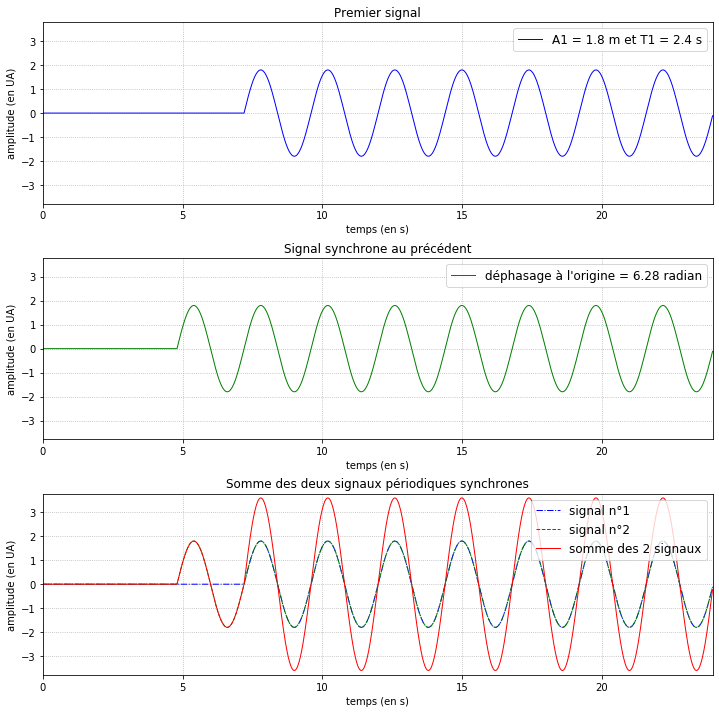

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))                         # taille de l'affichage de la figure
plt.subplots_adjust(hspace = 0.3)                         # espace réservé à chaque graphe
plt.rc('legend', fontsize='larger')                       # taille de l'affichage de la légende

# premier graphe
ax1 = fig.add_subplot(3, 1, 1)                            # séparation horizontale en trois de la figure
ax1.set_title('Premier signal')                           # Titre du graphe
ax1.plot(t,s1,color="blue",linewidth=1.0,linestyle="-",
         label="A1 = {:.1f} m et T1 = {:.1f} s".format(A1,T1))
# Trace le premier signal s1=f(t) en trait plein bleu
# Affiche en légende de A1 et T1 avec un chiffre après la virgule
ax1.legend(loc='upper right')                             # Affiche la légende en haut à droite
ax1.set_xlim(0,max(t))                                     # Bornes de l'axe des abscisses
ax1.set_ylim(-2.1*max(max(s1),max(s2)),2.1*max(max(s1),max(s2)))# Bornes de l'axe des ordonnées
ax1.set_xlabel('temps (en s)')                            # légende axe des abscisses
ax1.set_ylabel('amplitude (en UA)')                       # légende axe des ordonnées
ax1.grid(linestyle=":")                                   # Affiche une grille en petits points

# deuxième graphe
ax2 = fig.add_subplot(3, 1, 2)
ax2.set_title('Signal synchrone au précédent')            # Titre du graphe
ax2.plot(t,s2,color="green",linewidth=1,linestyle="-",
         label="déphasage à l'origine = {:.2f} radian".format(phi))
# Trace le deuxième signal s2=f(t) en trait plein vert
# Affiche en légende phi avec deux chiffres après la virgule
ax2.legend(loc='upper right')                             # Affiche la légende en haut à droite
ax2.set_xlim(0,max(t))                                     # Bornes de l'axe des abscisses
ax2.set_ylim(-2.1*max(max(s1),max(s2)),2.1*max(max(s1),max(s2)))# Bornes de l'axe des ordonnées
ax2.set_xlabel('temps (en s)')                            # légende axe des abscisses
ax2.set_ylabel('amplitude (en UA)')                       # légende axe des ordonnées
ax2.grid(linestyle=":")                                   # Affiche une grille en petits points

# troisième graphe
ax3 = fig.add_subplot(3, 1, 3)
ax3.set_title('Somme des deux signaux périodiques synchrones')  # Titre du graphe
ax3.plot(t,s1,color="blue",linewidth=1.0,linestyle="-.",
         label="signal n°1")
ax3.plot(t,s2,color="green",linewidth=1,linestyle="--",
         label="signal n°2")
ax3.plot(t,s3,color="red",linewidth=1,linestyle="-",
         label="somme des 2 signaux")
# Trace la somme des deux signaux périodiques synchrones s3=f(t) en trait plein rouge
ax3.legend(loc='upper right')                             # Affiche la légende en haut à droite
ax3.set_xlim(0,max(t))                                     # Bornes de l'axe des abscisses
ax3.set_ylim(-2.1*max(max(s1),max(s2)),2.1*max(max(s1),max(s2)))# Bornes de l'axe des ordonnées
ax3.set_xlabel('temps (en s)')                            # légende axe des abscisses
ax3.set_ylabel('amplitude (en UA)')                       # légende axe des ordonnées
ax3.grid(linestyle=":")                                   # Affiche une grille en petits points


## Représentation de la somme de deux signaux périodiques synchrones (unique graphe)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]             # taille de l'affichage du graphique
plt.rc('legend', fontsize='larger')                   # taille de l'affichage de la légende
plt.title('Somme des deux signaux périodiques synchrones')  # Titre du graphe
plt.xlabel('temps (en s)')                            # légende axe des abscisses
plt.ylabel('amplitude (en UA)')                       # légende axe des ordonnées
plt.xlim(0,max(t))                                     # Bornes de l'axe des abscisses
plt.ylim(-2.1*max(max(s1),max(s2)),2.1*max(max(s1),max(s2)))              # Bornes de l'axe des ordonnées
plt.grid(linestyle=":")                                            # Affiche une grille
plt.plot(t,s1,color="blue",linewidth=1.0,linestyle="-",
         label="A1 = {:.1f} m et T1 = {:.1f} s".format(A1,T1))
                                                      # Trace le premier signal s1=f(t) en trait plein bleu
                                                      # Affiche en légende de A1 et T1 avec un chiffre après la virgule
plt.plot(t,s2,color="green",linewidth=1,linestyle="-",
         label="déphasage à l'origine = {:.2f} radian".format(phi))
                                                      # Trace le second signal s2=f(t) en trait plein vert
                                                      # Affiche en légende phi avec deux chiffres après la virgule
plt.plot(t,s3,color="red",linewidth=1,linestyle="-",
         label="somme")
# Trace la somme des deux signaux périodiques synchrones s3=f(t) en trait plein rouge
plt.legend(loc='upper right')                         # Affiche la légende en haut à droite
plt.show()                                            # Affiche le graphique